In [1]:
import pandas as pd
from pandas.plotting import register_matplotlib_converters

In [2]:
df = pd.read_csv('/data/treasury_yield.csv')
df.NEW_DATE = pd.to_datetime(df.NEW_DATE)
df = df.set_index('NEW_DATE')

In [3]:
# list(df.tail(1).to_dict()['NEW_DATE'].values())[0]
def get_yield(a,y1,y3):
    s1,p1 = y1
    s3,p3 = y3

    r1 = a["BC_{0}".format(s1)]*.01
    r3 = a["BC_{0}".format(s3)]*.01
    
    r2 = ( ((((1 + r3)**p3)/(1 + r1)**p1))** (1/(p3-p1)) ) - 1  
#     print(r1,r2,r3)
    return r2*100
#     df.set_value(a.iloc,"FC_{0}_{1}".format(y1,y3-y1), r2)


def do_row(a):
    return a['Id']

df['FC_3_9'] = df.apply(get_yield,raw=True,axis=1,args=(('3MONTH',.25),('1YEAR',1)))
df['FC_12_5'] = df.apply(get_yield,raw=True,axis=1,args=(('1YEAR',1),('5YEAR',5)))

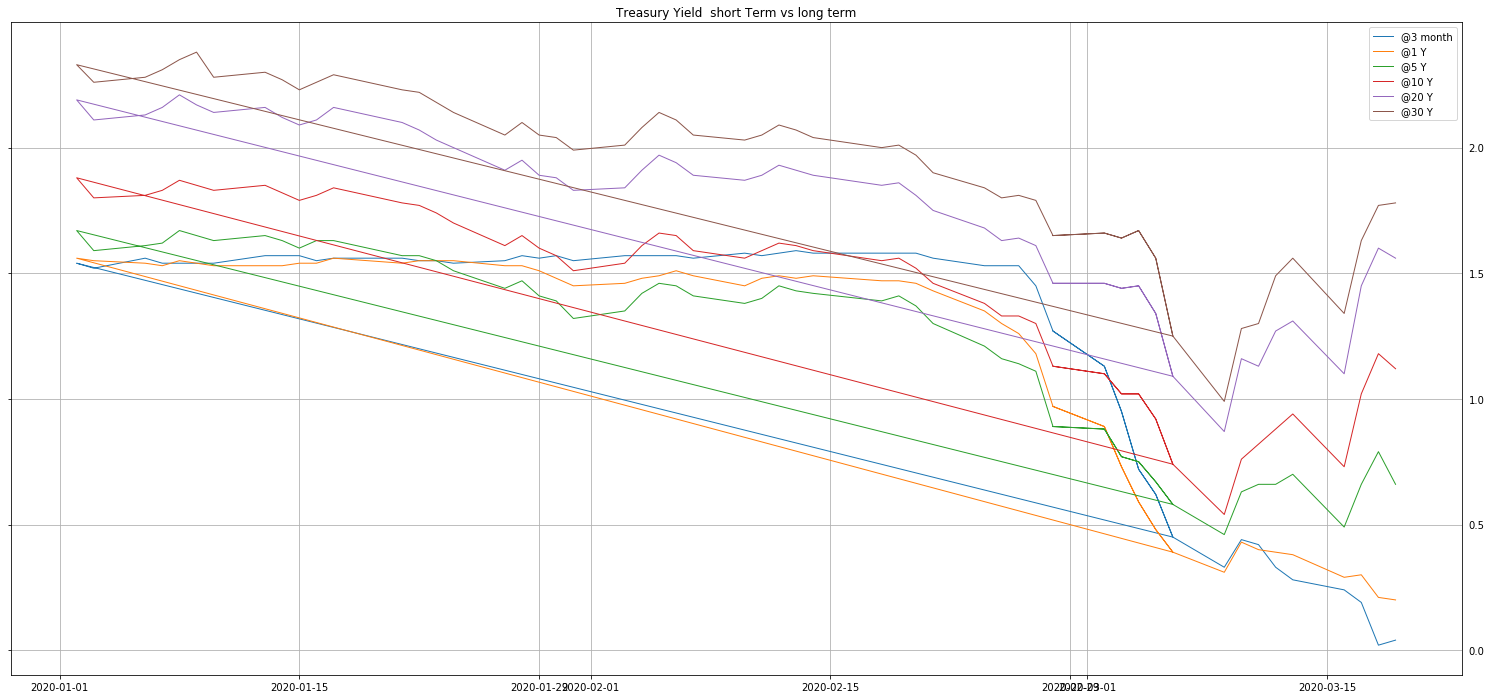

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
register_matplotlib_converters()
rcParams['figure.figsize'] = 26, 12
rcParams['lines.linewidth'] = 2


from U9 import line_plot
# df = df.head(1000)
# _df = df.tail(1500)
_df = df.tail(60)
# _df = df
# _df = _df.resample('7D', convention='end').mean()
# print(df['FC_3'])
# line_plot(plt,'',_df,colns=['BC_3MONTH','BC_1YEAR','BC_5YEAR','BC_10YEAR','BC_20YEAR','BC_30YEAR'],xSeries=_df.index)
line_plot(plt,
          'Treasury Yield  short Term vs long term',
          _df,
#           colns=['BC_3MONTH','BC_1YEAR','BC_5YEAR','FC_3_9','FC_12_5'],
          colns=['BC_3MONTH','BC_1YEAR','BC_5YEAR','BC_10YEAR','BC_20YEAR','BC_30YEAR'],
          colLabs=['@3 month','@1 Y','@5 Y','@10 Y','@20 Y','@30 Y'],
          xSeries=_df.index)
